### 0. Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV

### 1. Load data

In [4]:
spaceship_titanic_df = pd.read_csv('spaceship_titanic.csv')
spaceship_titanic_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
spaceship_titanic_df.shape

(8693, 14)

In [6]:
spaceship_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
spaceship_titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [8]:
spaceship_titanic_df.describe(include=["O"]).T

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2


## 2. Handle missing values
-  Categorical values:
    Replace missing values with most frequet value (moda)

-  Numerical values:
    Replace missing values with the mean value for the column   

In [9]:
spaceship_titanic_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
spaceship_titanic_df.isna().mean()

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [11]:
categorical_columns = spaceship_titanic_df.select_dtypes(include=['object']).columns
numerical_columns = spaceship_titanic_df._get_numeric_data().columns

print(categorical_columns)
print(numerical_columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')
Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')


In [12]:
for cat_col in categorical_columns:
    spaceship_titanic_df[cat_col] = spaceship_titanic_df[cat_col].fillna(spaceship_titanic_df[cat_col].mode()[0])

spaceship_titanic_df.isna().sum()

/tmp/ipykernel_296448/1416646153.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spaceship_titanic_df[cat_col] = spaceship_titanic_df[cat_col].fillna(spaceship_titanic_df[cat_col].mode()[0])


PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
dtype: int64

In [13]:
for num_col in numerical_columns:
    spaceship_titanic_df[num_col] = spaceship_titanic_df[num_col].fillna(spaceship_titanic_df[num_col].mean())

spaceship_titanic_df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

### 3. Feature engineering
Observing the data we can create a few new features from the existing ones.
1. Separate `Cabin` column into 3 new columns `Deck`, `Num`, `Side`.
2. Calculate `TotalSpent` by summing values from this columns `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` 




In [14]:
spaceship_titanic_df[['Deck', 'Num', 'Side']] = spaceship_titanic_df['Cabin'].str.split('/', expand=True)
spaceship_titanic_df['Num']=spaceship_titanic_df['Num'].astype('float64')
spaceship_titanic_df['TotalSpent'] = spaceship_titanic_df.loc[:,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [15]:
spaceship_titanic_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,TotalSpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S,1091.0


Drop redundent columns

In [16]:
columns_to_drop = ['PassengerId','Cabin','Name', "Num"]
# spaceship_titanic_df = spaceship_titanic_df.drop(columns=columns_to_drop, axis=1)

# update categorical columns after drop unnecessary columns
categorical_columns = spaceship_titanic_df.select_dtypes(include=['object', 'bool']).columns
# categorical_columns = categorical_columns.drop('Transported')
numerical_columns = spaceship_titanic_df._get_numeric_data().columns
numerical_columns = numerical_columns.drop('Transported')
categorical_columns


# spaceship_titanic_df.head()

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Transported', 'Deck', 'Side'],
      dtype='object')

### 4. Outlier detection / removal

In [16]:
def calculate_limits(col):
    Q1 = spaceship_titanic_df[col].quantile(0.25)
    Q3 = spaceship_titanic_df[col].quantile(0.75)
    IQR = Q3 - Q1   

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit, upper_limit


In [17]:
data_no_outliers = pd.DataFrame()

for col in spaceship_titanic_df.columns:
    if spaceship_titanic_df[col].dtype not in ('object','bool'):
        low, upp = calculate_limits(col)
        # print(low, upp)
        data_no_outliers = spaceship_titanic_df[~((spaceship_titanic_df[col] < low) | (spaceship_titanic_df[col] > upp))]

data_no_outliers.shape


(7759, 18)

In [18]:
spaceship_titanic_df = data_no_outliers.copy()

### 4. Exploratory Data Analysis

##### 4.1 Univariate data analysis

Distribution by count of values in the dataset

- Age less than 40 had high Transportation rate.
- Most of the 20-25 year olds did are not transported.
- Most passengers are in range 15-35 years old.

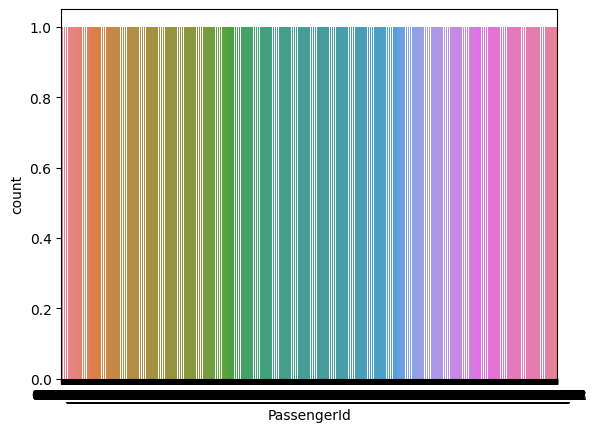

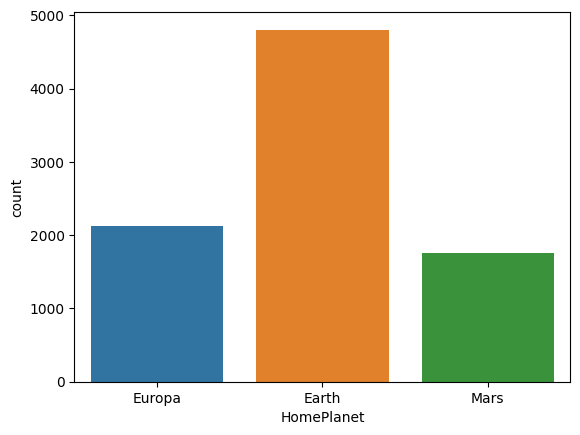

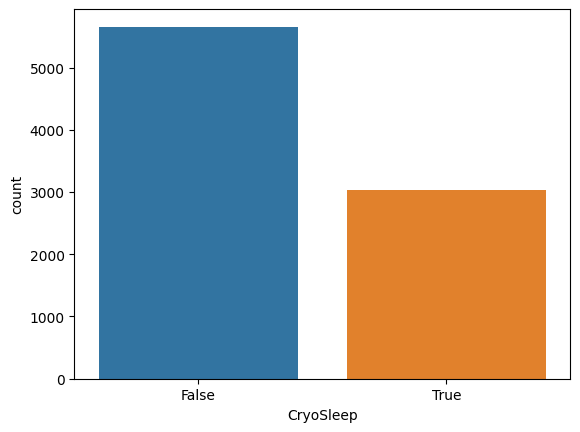

KeyboardInterrupt: 

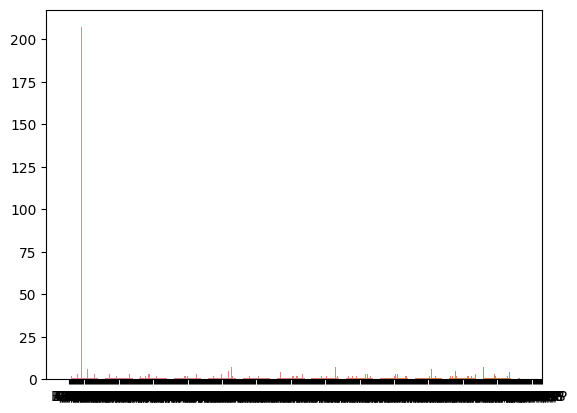

In [19]:
for col in categorical_columns:
    sns.countplot(x=spaceship_titanic_df[col], data=spaceship_titanic_df, hue=col, legend=False)
    plt.show()

Percentage distribution of the count with Pie Chart

In [18]:
for col in categorical_columns:
    spaceship_titanic_df[col].value_counts().plot(kind='pie',autopct='%.2f',colors=['lightgreen','pink','orange','lightblue'])
    plt.show()

KeyboardInterrupt: 

Distribution of `Age` and `TotalSpent`

The distribution of `Age` and `TotalSpent` columna are somewhat normaly distrubuted, but the distribution for the `TotalSpen` is highly skewed to the right

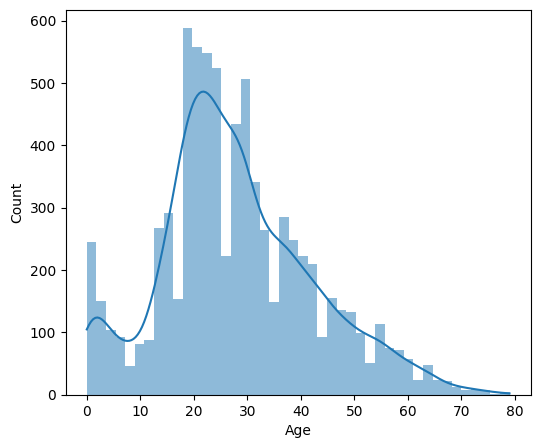

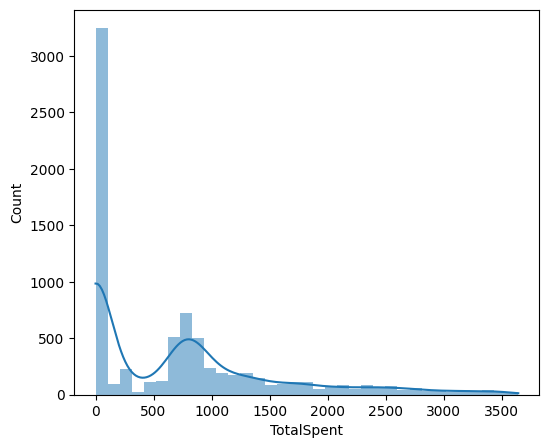

In [ ]:
def plot_age_totalspent():
    num_cols = ["Age", "TotalSpent"]

    for col in num_cols:
        plt.figure(figsize=(6,5))
        sns.histplot(spaceship_titanic_df[col], linewidth=0, kde=True)
        plt.show()

plot_age_totalspent()

##### 4.2. Bivariate Analysis

Distribution of the data count relative to the target variable (Transported)

- The likelihood for transportation is high for the Europa compared to this for Earth and Mars which are with nearly eqaul chances.
- Chnaces for transportation if you are in deck B or C are also very high. In other decks the chnaces is quite eqaul.
- Also the chance for transportation is higher if your destination is 55 Cancri e
- Destination=TRAPPIST-1e had most passengers, however most did not transported.
- Non VIP passengers had much better Transported rate than VIP

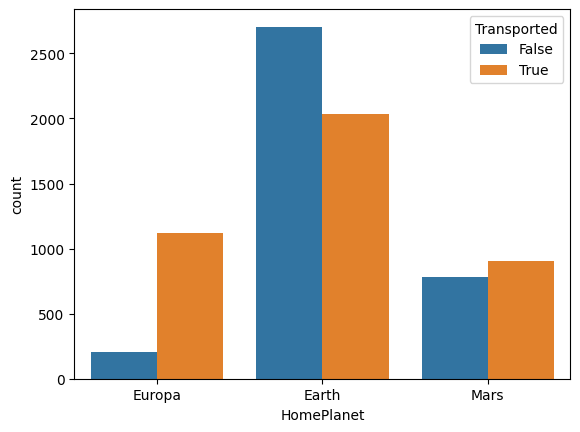

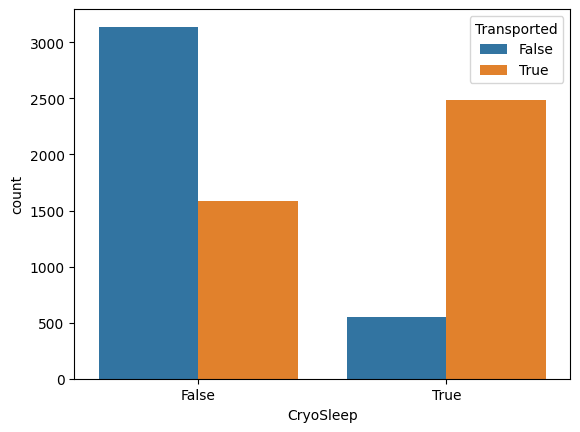

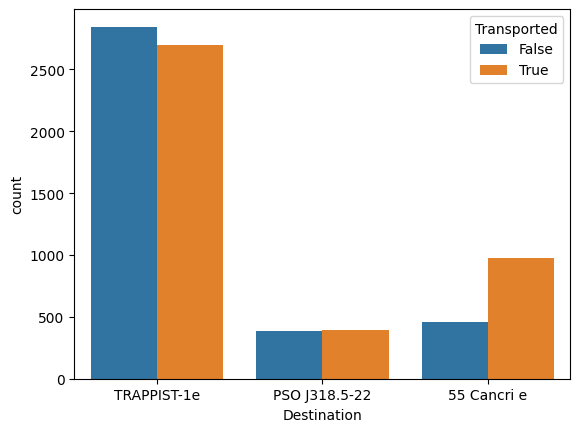

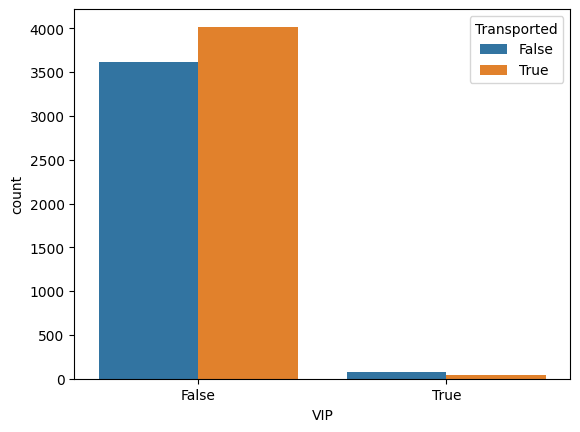

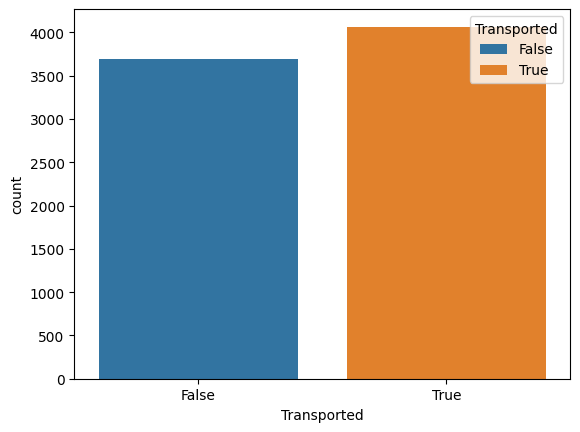

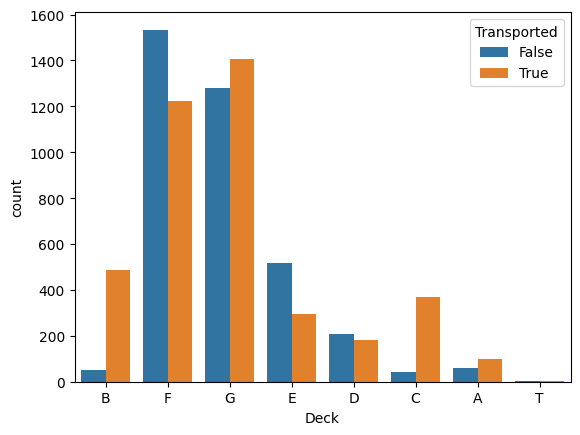

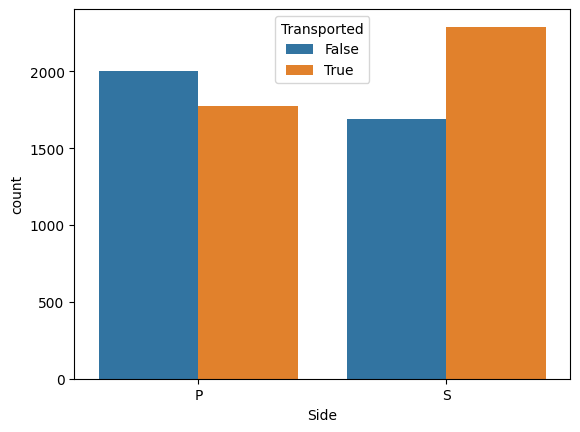

In [ ]:
for col in categorical_columns:
    sns.countplot(x=col, data=spaceship_titanic_df, hue="Transported", legend=True)
    plt.show()

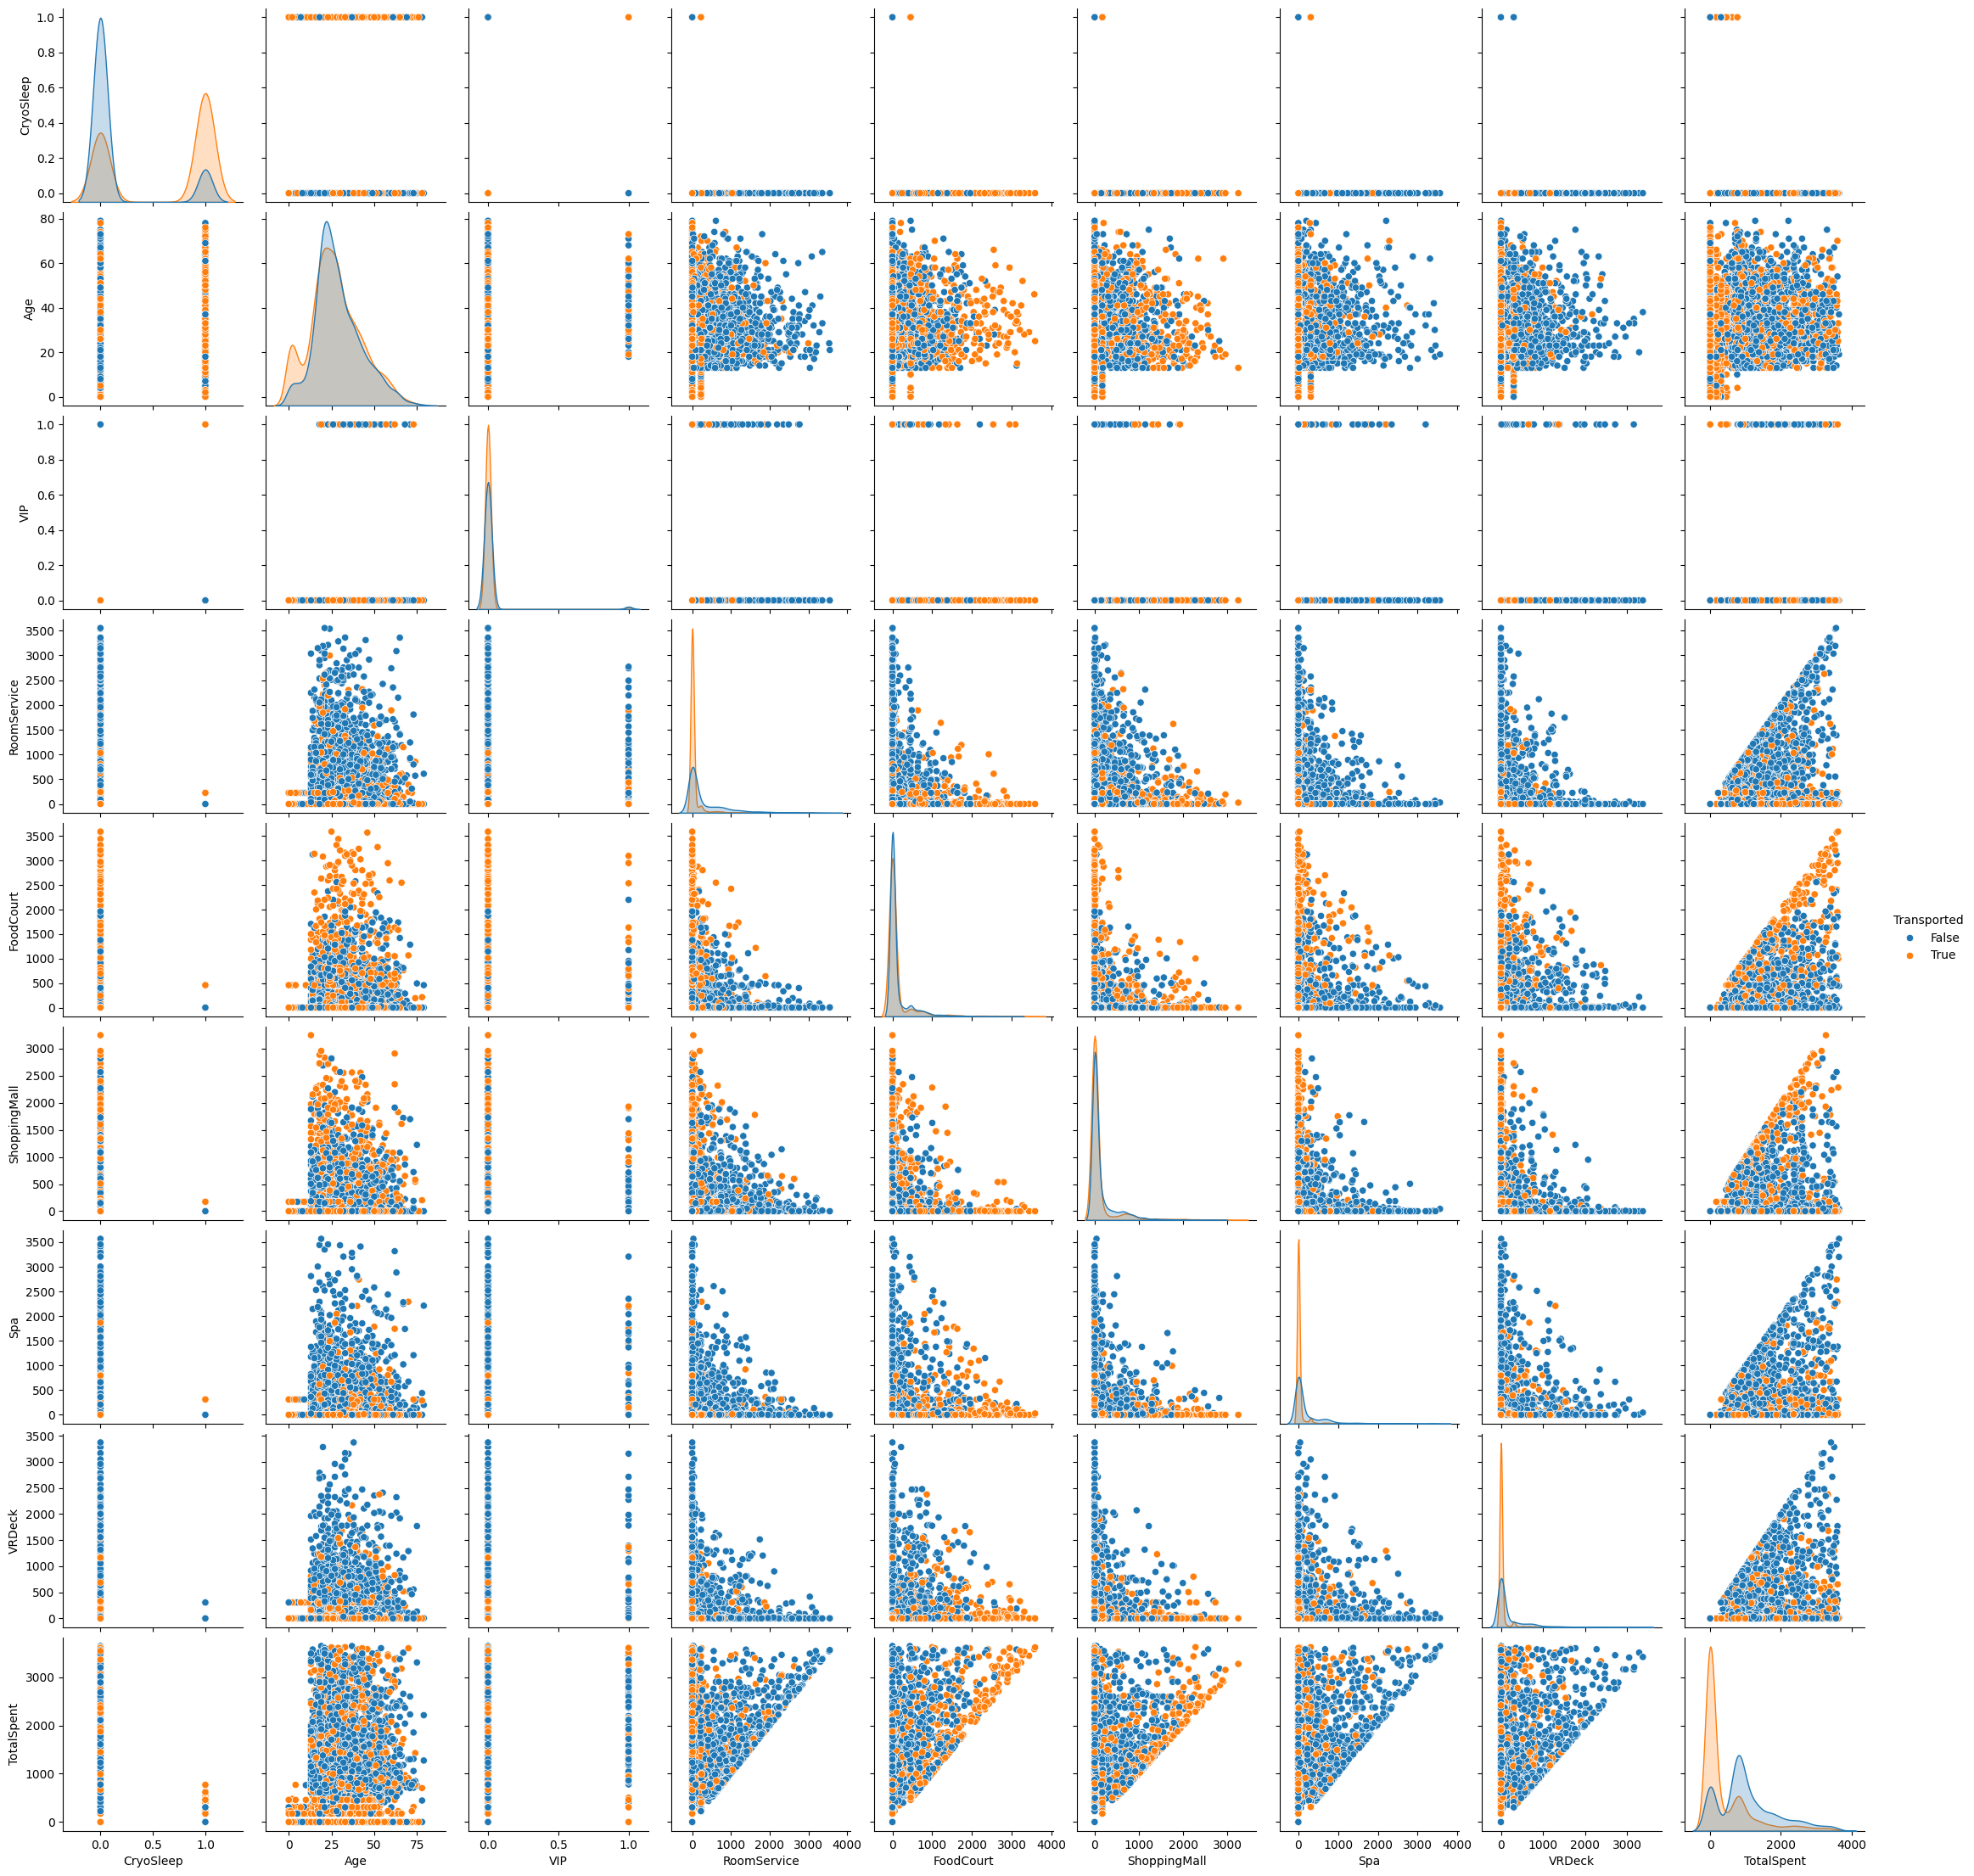

In [ ]:
sns.pairplot(spaceship_titanic_df, hue='Transported', diag_kind='kde')

#### 5. Data encoding

We can use one hot encoding to encode every categorical feature.

In [ ]:
# without converting it to float
# X = pd.get_dummies(spaceship_titanic_df.drop(columns='Transported'), drop_first=True)
X = pd.get_dummies(spaceship_titanic_df.drop(columns='Transported'), drop_first=True).astype(float)
y = spaceship_titanic_df["Transported"]

X

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent,HomePlanet_Europa,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,736.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1091.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,44.0,0.0,0.0,483.0,0.0,291.0,0.0,774.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,1584.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8686,0.0,32.0,0.0,1.0,1146.0,0.0,50.0,34.0,1231.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8687,0.0,30.0,0.0,0.0,3208.0,0.0,2.0,330.0,3540.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Print first values of the encoded dataframe

In [ ]:
X.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent,HomePlanet_Europa,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,736.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1091.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,44.0,0.0,0.0,483.0,0.0,291.0,0.0,774.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,1584.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Print target variable

In [ ]:
y

0       False
1        True
4        True
5        True
6        True
        ...  
8685     True
8686    False
8687     True
8689    False
8690     True
Name: Transported, Length: 7759, dtype: bool

#### 6. Feature selection

In [ ]:
sns.heatmap(spaceship_titanic_df[numerical_columns].corr(),annot=True)



Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'TotalSpent'],
      dtype='object')

In [ ]:
chi_score = chi2(X, y)
chi_score

(array([1.04921271e+03, 1.84034000e+02, 7.40194396e+00, 7.60716235e+05,
        3.29276863e+03, 5.89696062e+03, 5.12255230e+05, 4.41237893e+05,
        1.05550449e+06, 5.48223039e+02, 1.13236715e+00, 9.75896320e-01,
        3.10615621e+01, 3.15576325e+02, 2.27222504e+02, 5.14633626e+00,
        8.33949860e+01, 7.15203108e+01, 4.09942686e-03, 4.63277263e-03,
        4.22861609e+01]),
 array([3.60953420e-230, 6.37803623e-042, 6.51534317e-003, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 3.06586076e-121, 2.87270985e-001, 3.23214043e-001,
        2.49972847e-008, 1.33196927e-070, 2.40482735e-051, 2.32954749e-002,
        6.71922055e-020, 2.74418755e-017, 9.48948914e-001, 9.45734310e-001,
        7.88485405e-011]))

<Axes: >

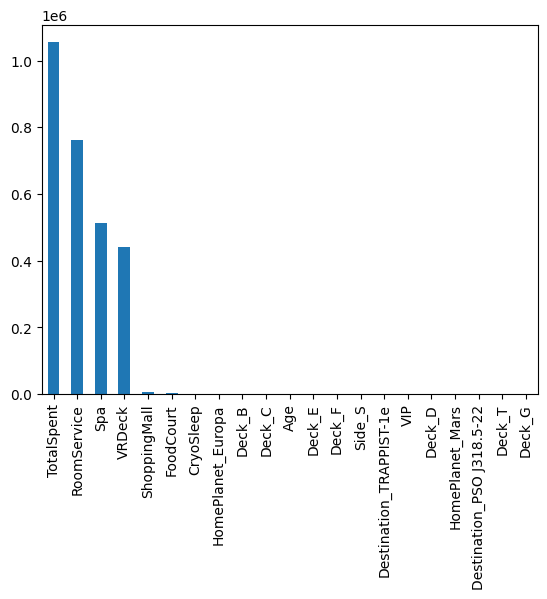

In [ ]:
chi_values = pd.Series(chi_score[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()


(7759, 21)

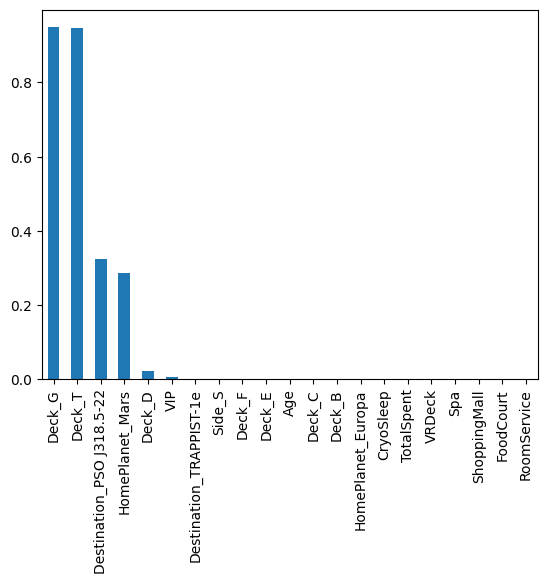

In [ ]:
p_values = pd.Series(chi_score[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

X.shape

In [ ]:
selected_features = list(chi_values.index)[:15]
selected_features
spaceship_titanic_df

X = X[selected_features]

X


,TotalSpent,RoomService,Spa,VRDeck,ShoppingMall,FoodCourt,CryoSleep,HomePlanet_Europa,Deck_B,Deck_C,Age,Deck_E,Deck_F,Side_S,Destination_TRAPPIST-1e
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,39.0,0.0,0.0,0.0,1.0
1,736.0,109.0,549.0,44.0,25.0,9.0,0.0,0.0,0.0,0.0,24.0,0.0,1.0,1.0,1.0
4,1091.0,303.0,565.0,2.0,151.0,70.0,0.0,0.0,0.0,0.0,16.0,0.0,1.0,1.0,1.0
5,774.0,0.0,291.0,0.0,0.0,483.0,0.0,0.0,0.0,0.0,44.0,0.0,1.0,0.0,0.0
6,1584.0,42.0,0.0,0.0,3.0,1539.0,0.0,0.0,0.0,0.0,26.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8686,1231.0,1.0,50.0,34.0,0.0,1146.0,0.0,1.0,0.0,0.0,32.0,0.0,0.0,0.0,1.0
8687,3540.0,0.0,2.0,330.0,0.0,3208.0,0.0,1.0,0.0,0.0,30.0,0.0,0.0,0.0,1.0
8689,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.0,0.0,0.0,1.0,0.0


#### 7. Model selection

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
random_forest = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()

models = [random_forest, svm, knn, logistic_regression, decision_tree]

In [ ]:
eval_values_df = pd.DataFrame(columns=['Model', 'Cross Validated Accuracy'],index=None)

In [ ]:
def eval_model(model):
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    eval_values_df.loc[len(eval_values_df)] = [str(model), score.mean()]

In [ ]:
for model in models:
    eval_model(model)
    
eval_values_df

,Model,Cross Validated Accuracy
0,RandomForestClassifier(),0.772420
1,SVC(),0.783652
2,KNeighborsClassifier(),0.759160
3,LogisticRegression(),0.770946
4,DecisionTreeClassifier(),0.717546


In [ ]:
models_params = {
    'svm': {
        'model': svm,
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': random_forest,
        'params' : {
            'n_estimators': range(1, 11)
        }
    },
    'logistic_regression' : {
        'model': logistic_regression,
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree': {
        'model': decision_tree,
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    },
    'knn': {
        'model': knn,
        'params': {
            'n_neighbors': range(1,25)
        }  
    }   
}

In [ ]:
scores = []
tunned_models = {}

for model_name, model_params in models_params.items():
    grid_model =  GridSearchCV(model_params['model'], model_params['params'], cv=5, return_train_score=False)
    grid_model.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': grid_model.best_score_,
        'best_params': grid_model.best_params_
    })
    tunned_models[model_name] = grid_model.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.783652,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.764502,{'n_estimators': 9}
2,logistic_regression,0.770946,{'C': 1}
3,decision_tree,0.716810,{'criterion': 'gini'}
4,knn,0.773525,{'n_neighbors': 22}


In [ ]:
models_name = ["svm", "random_forest", "logistic_regression", "decision_tree", "knn"]

for model_name in models_name:
    y_pred = tunned_models[model_name].predict(X_test)
    print(f"Accuracy for {model_name} is {accuracy_score(y_test, y_pred)}")
    print(f"F1-Score for {model_name} is {f1_score(y_test, y_pred)}")
    print("--------------------------------------------------------------")
    


Accuracy for svm is 0.8032646048109966
F1-Score for svm is 0.8198269079464988
--------------------------------------------------------------
Accuracy for random_forest is 0.7658934707903781
F1-Score for random_forest is 0.7754429336629584
--------------------------------------------------------------
Accuracy for logistic_regression is 0.7899484536082474
F1-Score for logistic_regression is 0.8071005917159764
--------------------------------------------------------------
Accuracy for decision_tree is 0.7366838487972509
F1-Score for decision_tree is 0.7535182951347005
--------------------------------------------------------------
Accuracy for knn is 0.7835051546391752
F1-Score for knn is 0.791907514450867
--------------------------------------------------------------
